<h1 align="center"> Predictive Analytics </h1>

# Importing Needed Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading Cleaned Data

In [2]:
data = pd.read_csv("./cleanedDataPriceDr.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158470 entries, 0 to 158469
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        158470 non-null  int64  
 1   Unnamed: 0.1                      158470 non-null  int64  
 2   CentralAir-conditioning           158470 non-null  float64
 3   Foundation                        158470 non-null  float64
 4   Condominium                       158470 non-null  float64
 5   Deck                              158470 non-null  float64
 6   DesignofHouse                     158470 non-null  float64
 7   Division                          158470 non-null  int64  
 8   TypeofFinancing                   158470 non-null  float64
 9   FinishedBasement                  158470 non-null  float64
 10  ParkingFacility                   158470 non-null  float64
 11  PrimarySpaceHeatingSystem         158470 non-null  f

In [4]:
#choosing 5000 readings randomly as to facilitate data processesing so that it will not take too much time to train
data=data.sample(n=5000,random_state=1)
data.head()

,Unnamed: 0,Unnamed: 0.1,CentralAir-conditioning,Foundation,Condominium,Deck,DesignofHouse,Division,TypeofFinancing,FinishedBasement,...,FullBathrooms,HalfBathrooms,SaleDate,Weight,PrimarySpaceHeatingFuel,SalesPrice,SquareFootAreaofHouse,LotValue,SquareFootAreaofFinishedBasement,SquareFootAreaoftheLot
102737,152329,30725,1.0,3.0,2.0,2.0,1.0,9,1.0,0.0,...,3.0,1.0,200601,69,2.0,944200.0,4104.0,94000.0,0.0,8537.0
76709,109797,26495,1.0,3.0,2.0,2.0,1.0,7,1.0,0.0,...,3.0,0.0,200408,97,2.0,260000.0,2592.0,34000.0,0.0,9300.0
21378,29189,19016,1.0,2.0,2.0,1.0,1.0,5,5.0,0.0,...,2.0,0.0,200008,97,1.0,117900.0,1363.0,22000.0,0.0,43560.0
37388,51336,25807,1.0,3.0,2.0,2.0,1.0,7,2.0,0.0,...,2.0,0.0,200112,44,2.0,90000.0,1566.0,10000.0,0.0,22500.0
49266,68630,23716,1.0,3.0,2.0,2.0,1.0,7,2.0,0.0,...,2.0,1.0,200207,63,2.0,155500.0,2985.0,15000.0,0.0,10368.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 102737 to 149178
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5000 non-null   int64  
 1   Unnamed: 0.1                      5000 non-null   int64  
 2   CentralAir-conditioning           5000 non-null   float64
 3   Foundation                        5000 non-null   float64
 4   Condominium                       5000 non-null   float64
 5   Deck                              5000 non-null   float64
 6   DesignofHouse                     5000 non-null   float64
 7   Division                          5000 non-null   int64  
 8   TypeofFinancing                   5000 non-null   float64
 9   FinishedBasement                  5000 non-null   float64
 10  ParkingFacility                   5000 non-null   float64
 11  PrimarySpaceHeatingSystem         5000 non-null   float64
 12 

In [6]:
#dropping unecessary variables
data=data.iloc[:,2:]

# Data Preprocessing

## Feature Selection based on Correlation

In [7]:
#dropping the response variable: SalesPrice so that to include only the independent variables
data_features=data.drop(['SalesPrice'],axis=1)

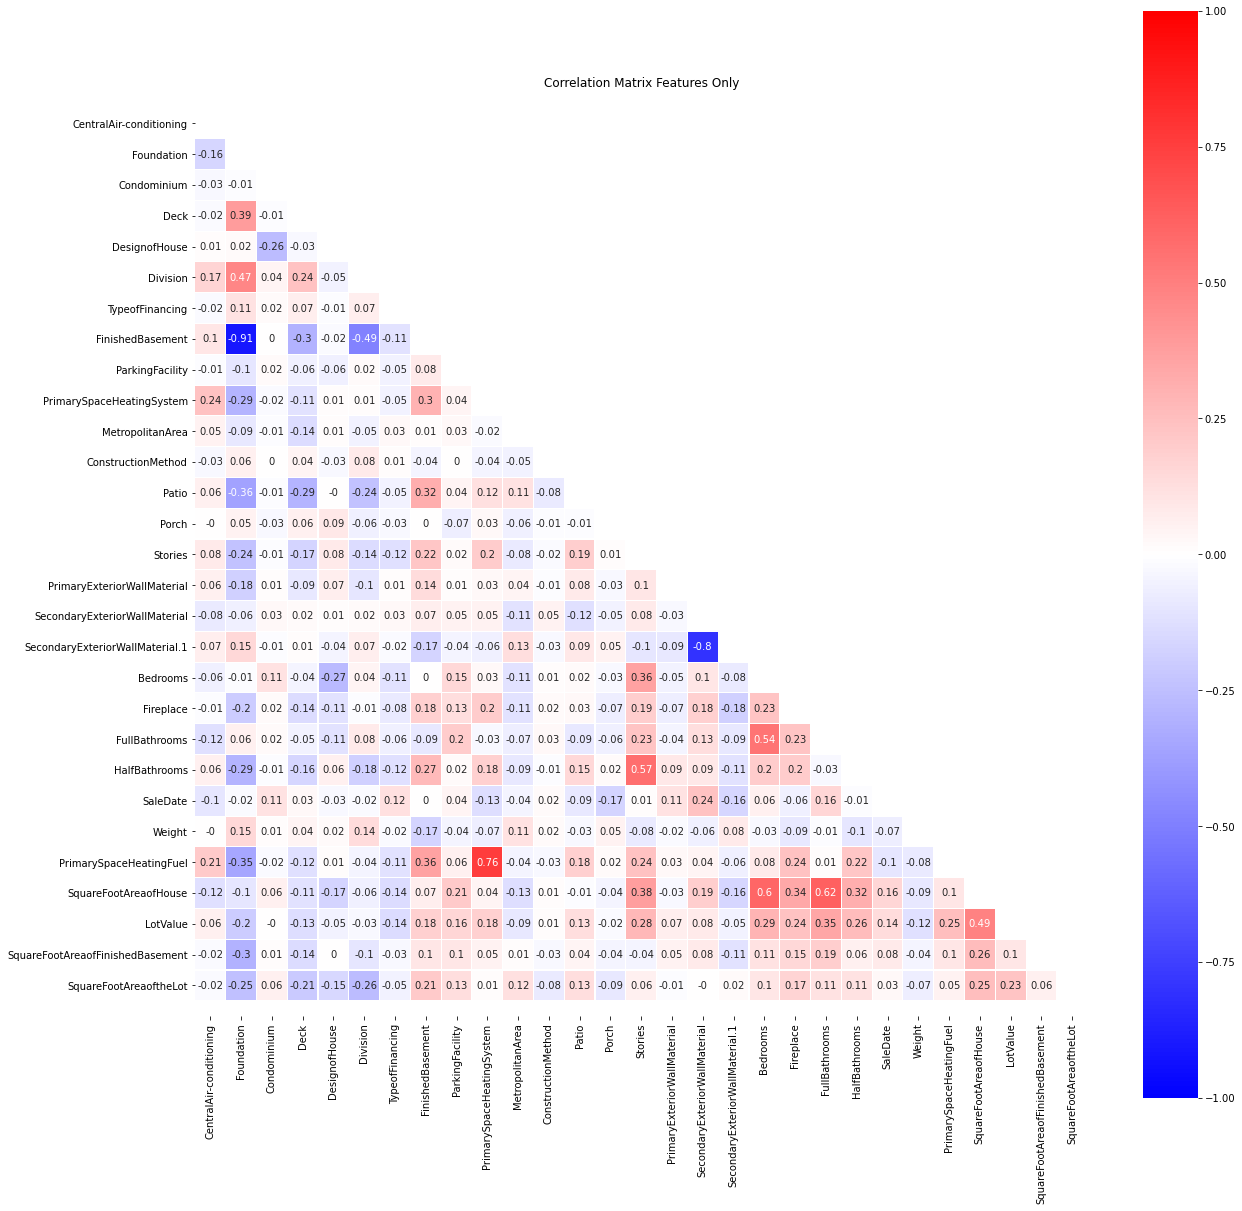

In [8]:
#Heat Map Showing correlations among the features
corr = data_features.corr().round(2)
f, ax = plt.subplots(figsize =(20, 20)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='bwr', mask=mask, annot=True,square=True, linewidths = 0.1,vmin=-1, vmax=1)
plt.title('Correlation Matrix Features Only')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Removing highly correlated features (with an absolute correlation greater than 0.6)

<u>The threshold of 0.6 is recommended by:</u> Reddy, C., Balasubramanyam, P., & Subbarayudu, M. (2013). An effective approach to resolve multicollinearity in agriculture data. International journal of research in electronics and computer engineering, 1(1), 27-30.

In [9]:
#removing highly correlated features
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.6:
            if columns[j]:
                columns[j] = False

In [10]:
#removed features
removed_columns = data_features.columns[[not columns[i] for i in range(len(columns))]]
removed_columns

Index(['FinishedBasement', 'SecondaryExteriorWallMaterial.1',
       'PrimarySpaceHeatingFuel', 'SquareFootAreaofHouse'],
      dtype='object')

In [11]:
#selected features
selected_columns = data_features.columns[columns]
selected_columns

Index(['CentralAir-conditioning', 'Foundation', 'Condominium', 'Deck',
       'DesignofHouse', 'Division', 'TypeofFinancing', 'ParkingFacility',
       'PrimarySpaceHeatingSystem', 'MetropolitanArea', 'ConstructionMethod',
       'Patio', 'Porch', 'Stories', 'PrimaryExteriorWallMaterial',
       'SecondaryExteriorWallMaterial', 'Bedrooms', 'Fireplace',
       'FullBathrooms', 'HalfBathrooms', 'SaleDate', 'Weight', 'LotValue',
       'SquareFootAreaofFinishedBasement', 'SquareFootAreaoftheLot'],
      dtype='object')

In [12]:
#concatinating the data
data=pd.concat([data['SalesPrice'],data_features[selected_columns]],axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 102737 to 149178
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SalesPrice                        5000 non-null   float64
 1   CentralAir-conditioning           5000 non-null   float64
 2   Foundation                        5000 non-null   float64
 3   Condominium                       5000 non-null   float64
 4   Deck                              5000 non-null   float64
 5   DesignofHouse                     5000 non-null   float64
 6   Division                          5000 non-null   int64  
 7   TypeofFinancing                   5000 non-null   float64
 8   ParkingFacility                   5000 non-null   float64
 9   PrimarySpaceHeatingSystem         5000 non-null   float64
 10  MetropolitanArea                  5000 non-null   int64  
 11  ConstructionMethod                5000 non-null   float64
 12 

## One Hot Encoding Method

The categorical/string columns cannot be directly used as input for most algorithms. We used one-hot encoding method for these categorical variables with more than two categories.

In [14]:
data = pd.get_dummies(data=data, 
                   columns=['Foundation','Division', 'TypeofFinancing', 'ParkingFacility',
                            'PrimarySpaceHeatingSystem', 'ConstructionMethod', 
                            'Stories', 'PrimaryExteriorWallMaterial', 'Bedrooms', 
                            'Fireplace','FullBathrooms', 'HalfBathrooms'],
                   prefix =['Foundation','Division', 'TypeofFinancing', 'ParkingFacility',
                            'PrimarySpaceHeatingSystem', 'ConstructionMethod', 
                            'Stories', 'PrimaryExteriorWallMaterial', 'Bedrooms', 
                            'Fireplace','FullBathrooms', 'HalfBathrooms'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 102737 to 149178
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SalesPrice                        5000 non-null   float64
 1   CentralAir-conditioning           5000 non-null   float64
 2   Condominium                       5000 non-null   float64
 3   Deck                              5000 non-null   float64
 4   DesignofHouse                     5000 non-null   float64
 5   MetropolitanArea                  5000 non-null   int64  
 6   Patio                             5000 non-null   float64
 7   Porch                             5000 non-null   float64
 8   SecondaryExteriorWallMaterial     5000 non-null   float64
 9   SaleDate                          5000 non-null   int64  
 10  Weight                            5000 non-null   int64  
 11  LotValue                          5000 non-null   float64
 12 

## Data Partition

In [15]:
X=data.drop('SalesPrice',axis=1)
X.head()

,CentralAir-conditioning,Condominium,Deck,DesignofHouse,MetropolitanArea,Patio,Porch,SecondaryExteriorWallMaterial,SaleDate,Weight,...,Fireplace_0.0,Fireplace_1.0,Fireplace_2.0,FullBathrooms_1.0,FullBathrooms_2.0,FullBathrooms_3.0,FullBathrooms_4.0,HalfBathrooms_0.0,HalfBathrooms_1.0,HalfBathrooms_2.0
102737,1.0,2.0,2.0,1.0,1,1.0,2.0,7.0,200601,69,...,0,0,1,0,0,1,0,0,1,0
76709,1.0,2.0,2.0,1.0,1,1.0,2.0,0.0,200408,97,...,0,1,0,0,0,1,0,1,0,0
21378,1.0,2.0,1.0,1.0,2,2.0,1.0,0.0,200008,97,...,1,0,0,0,1,0,0,1,0,0
37388,1.0,2.0,2.0,1.0,2,1.0,1.0,5.0,200112,44,...,0,1,0,0,1,0,0,1,0,0
49266,1.0,2.0,2.0,1.0,1,1.0,2.0,8.0,200207,63,...,0,1,0,0,1,0,0,0,1,0


In [16]:
y=data['SalesPrice']

In [17]:
from sklearn.model_selection import train_test_split
# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.2,
                                                 random_state=123)

In [18]:
train_X.shape

(4000, 66)

In [19]:
train_y.shape

(4000,)

In [20]:
test_y.shape

(1000,)

In [21]:
test_X.shape

(1000, 66)

## Normalize Data

In [22]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [23]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,4000.0,0.08225,0.274780,0.0,0.0,0.0,0.0,1.0
Condominium,4000.0,0.97450,0.157658,0.0,1.0,1.0,1.0,1.0
Deck,4000.0,0.75525,0.429993,0.0,1.0,1.0,1.0,1.0
DesignofHouse,4000.0,0.06325,0.243443,0.0,0.0,0.0,0.0,1.0
MetropolitanArea,4000.0,0.07350,0.260988,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
FullBathrooms_3.0,4000.0,0.22675,0.418782,0.0,0.0,0.0,0.0,1.0
FullBathrooms_4.0,4000.0,0.04825,0.214321,0.0,0.0,0.0,0.0,1.0
HalfBathrooms_0.0,4000.0,0.49375,0.500023,0.0,0.0,0.0,1.0,1.0
HalfBathrooms_1.0,4000.0,0.49300,0.500014,0.0,0.0,0.0,1.0,1.0


In [24]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CentralAir-conditioning,1000.0,0.092,0.289171,0.0,0.0,0.0,0.0,1.0
Condominium,1000.0,0.981,0.136593,0.0,1.0,1.0,1.0,1.0
Deck,1000.0,0.736,0.441020,0.0,0.0,1.0,1.0,1.0
DesignofHouse,1000.0,0.064,0.244875,0.0,0.0,0.0,0.0,1.0
MetropolitanArea,1000.0,0.088,0.283437,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
FullBathrooms_3.0,1000.0,0.194,0.395627,0.0,0.0,0.0,0.0,1.0
FullBathrooms_4.0,1000.0,0.050,0.218054,0.0,0.0,0.0,0.0,1.0
HalfBathrooms_0.0,1000.0,0.478,0.499766,0.0,0.0,0.0,1.0,1.0
HalfBathrooms_1.0,1000.0,0.508,0.500186,0.0,0.0,1.0,1.0,1.0


# Model 1: KNN Regressor

### Model Building

In [25]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsRegressor(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [26]:
knn5.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [28]:
#Mean Absolute Error
metrics.mean_absolute_error(test_y, pred_y_knn5)

70615.54

In [29]:
#Mean Squared Error
metrics.mean_squared_error(test_y, pred_y_knn5)

10972395198.8

In [30]:
#R-squared
metrics.r2_score(test_y, pred_y_knn5)

0.5124793431125778

In [31]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn5))

104749.20142320894

In [32]:
#Mean Absolute Percentage Error
np.mean(np.abs(pred_y_knn5 - test_y)/np.abs(test_y))

0.2761020261931243

### Model Tunning

In [33]:
#tunning the model based on Mean Absolute Error
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(train_X_scale, train_y)
    pred_y = knn.predict(test_X_scale)
    print("MAE is ", metrics.mean_absolute_error(test_y, pred_y),"for k =",k)

MAE is  85375.2 for k = 1
MAE is  75607.15 for k = 2
MAE is  71487.43333333335 for k = 3
MAE is  70700.425 for k = 4
MAE is  70615.54 for k = 5
MAE is  70564.86666666665 for k = 6
MAE is  70878.17142857143 for k = 7
MAE is  70659.7375 for k = 8
MAE is  70108.65555555555 for k = 9
MAE is  69697.44 for k = 10
MAE is  69749.58181818182 for k = 11
MAE is  69809.925 for k = 12
MAE is  70027.39230769232 for k = 13
MAE is  70214.0 for k = 14
MAE is  70725.4 for k = 15
MAE is  70973.2625 for k = 16
MAE is  71147.32941176472 for k = 17
MAE is  71046.03333333333 for k = 18
MAE is  71122.48421052632 for k = 19
MAE is  71026.82 for k = 20


### Model Testing

We have the lowest MAE for k=10

In [34]:
knn_final = neighbors.KNeighborsRegressor(n_neighbors = 10, 
                                      weights='uniform',                                    
                                      algorithm='auto')
knn_final.fit(train_X_scale, train_y)
pred_y_knn_final = knn_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_knn_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_knn_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_knn_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_knn_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 69697.44
Mean Squared Error is 10496671118.8
R-squared is 0.5336165070386574
Root Mean Squared Error is 102453.26309493514
Mean Absolute Percentage Error is 0.2769109554874558


# Model 2: Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

### Model Building

In [36]:
# Train an RF Regressor
rf = RandomForestRegressor(n_estimators=5, max_features=10, random_state=123)

In [37]:
rf.fit(train_X_scale,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [38]:
# Show feature importance
rf.feature_importances_

array([4.33358102e-03, 2.02333605e-03, 7.19606559e-03, 1.14732895e-03,
       2.27606993e-03, 7.11133319e-03, 8.19982293e-03, 1.68962500e-02,
       7.03045010e-02, 3.33902285e-02, 3.07489854e-01, 8.88113612e-03,
       6.18690566e-02, 6.98356274e-03, 2.50800753e-03, 7.75544612e-03,
       4.91675511e-04, 5.85903328e-03, 1.60532511e-02, 6.74617529e-04,
       2.85894423e-03, 6.18535133e-03, 1.78924830e-03, 2.61652811e-03,
       2.95329712e-03, 1.18519557e-02, 4.53048723e-03, 2.86257333e-03,
       7.50481459e-04, 2.22441567e-03, 6.24029459e-05, 9.82897502e-04,
       6.31793552e-03, 2.51610482e-02, 3.80777745e-03, 8.25996133e-03,
       5.99268357e-03, 6.04647012e-04, 3.08722291e-05, 1.75216836e-04,
       1.59828986e-03, 7.18575378e-04, 7.68309124e-03, 2.46223459e-02,
       2.52829407e-03, 7.68830331e-03, 7.03240493e-03, 5.02494965e-03,
       7.39819979e-04, 4.65587658e-04, 7.05240077e-03, 3.58284425e-03,
       1.42528081e-03, 2.49751422e-02, 1.29472343e-02, 6.73965114e-03,
      

In [39]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
LotValue,0.307490
FullBathrooms_2.0,0.070538
SaleDate,0.070305
SquareFootAreaoftheLot,0.061869
FullBathrooms_4.0,0.039371
...,...
Foundation_4.0,0.000492
PrimaryExteriorWallMaterial_6.0,0.000466
ConstructionMethod_1.0,0.000175
TypeofFinancing_5.0,0.000062


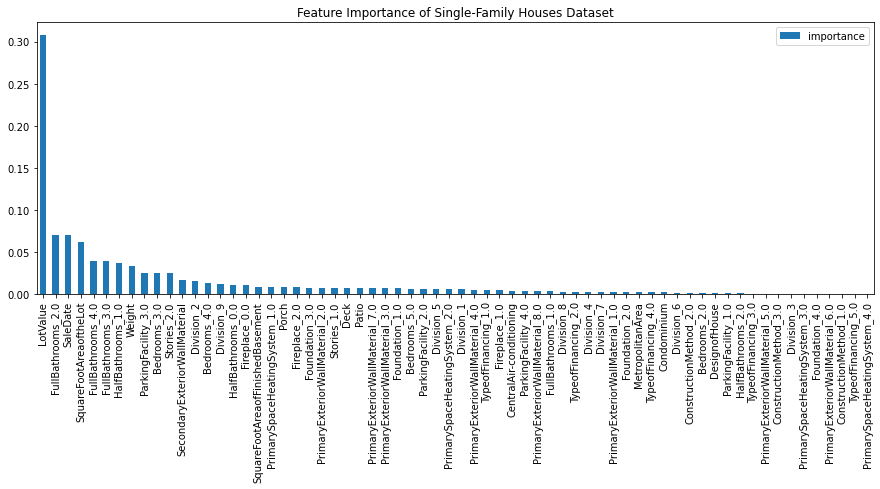

In [40]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Single-Family Houses Dataset')

In [41]:
# Predict on test set
pred_y_rf = rf.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_rf))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_rf))
print('R-squared is',metrics.r2_score(test_y, pred_y_rf))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_rf - test_y)/np.abs(test_y)))

Mean Absolute Error is 54905.0
Mean Squared Error is 6574553984.8
R-squared is 0.7078822974074014
Root Mean Squared Error is 81083.62340694945
Mean Absolute Percentage Error is 0.21628562836203638


### Model Tunning

In [42]:
parameters = {'criterion': ['mse','mae'],
              'n_estimators':[10,20,30,40,50,60,70,80,90,100],
              'random_state':[123]}

In [43]:
rf2 = RandomForestRegressor()

In [44]:
# Use a 5-fold cross-validation
grid_rf = GridSearchCV(rf2, parameters, cv=5)

In [45]:
import time
start = time.time()
print('Time Sart:'+ time.strftime("%m/%d/%Y %H:%M:%S"))

grid_rf.fit(train_X_scale,train_y)

end = time.time()
print('Time End:'+ time.strftime("%m/%d/%Y %H:%M:%S"))
print('Execution Time (Seconds):' + str(end - start))

Time Sart:04/30/2020 19:10:40
Time End:04/30/2020 19:39:29
Execution Time (Seconds):1728.8935451507568


In [46]:
# Show best parameters
grid_rf.best_params_

{'criterion': 'mae', 'n_estimators': 100, 'random_state': 123}

### Model testing

In [47]:
# Train a new RF with best parameters
rf_final = RandomForestRegressor(criterion='mae',n_estimators=100, random_state=123)

In [48]:
rf_final.fit(train_X_scale,train_y)
# Predict on test set
pred_y_rf_final = grid_rf.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_rf_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_rf_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_rf_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_rf_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 44351.835
Mean Squared Error is 4200716654.3135
R-squared is 0.813355597788455
Root Mean Squared Error is 64812.93585630495
Mean Absolute Percentage Error is 0.17351918558137924


# Model 3: ANN

### Model Building

In [49]:
from sklearn import neural_network
ann1 = neural_network.MLPRegressor(alpha=1e-5,max_iter=1000,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [50]:
ann1.fit(train_X_scale, train_y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=20, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [51]:
# Predict on test set
pred_y1 = ann1.predict(test_X_scale)
pd.Series(pred_y1).describe()

count      1000.000000
mean     120094.361628
std        6847.332392
min       96793.323782
25%      115145.708273
50%      119818.877427
75%      124881.440873
max      143903.881269
dtype: float64

### Model Tunning

In [52]:
parameters = {'alpha': [1e-5],
              'batch_size':[32,64,128],
              'solver':['lbfgs'],
              'learning_rate':['constant', 'adaptive'],
              'hidden_layer_sizes':[2,3,4,5,6,7,8,9,10,(1, 1),(2, 2),(3, 3),(1, 1, 1),(2, 2, 2),(3, 3, 3)],
              'random_state':[123]}

In [53]:
ann2 = neural_network.MLPRegressor(max_iter=1000)

In [54]:
# Use a 5-fold cross-validation
grid_ann = GridSearchCV(ann2, parameters, cv=5)

In [55]:
grid_ann.fit(train_X_scale,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=1000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05], 'batch_size': [32, 64, 128],
                         'hidden_layer_sizes

In [56]:
# Show best parameters
grid_ann.best_params_

{'alpha': 1e-05,
 'batch_size': 32,
 'hidden_layer_sizes': (3, 3),
 'learning_rate': 'constant',
 'random_state': 123,
 'solver': 'lbfgs'}

### Model Testing

In [57]:
# Train a new RF with best parameters
ann_final = neural_network.MLPRegressor(max_iter=1000,alpha= 1e-05,
 batch_size= 32,
 hidden_layer_sizes= 10,
 learning_rate= 'constant',
 random_state= 123,
 solver= 'lbfgs')
ann_final.fit(train_X_scale, train_y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=123, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [58]:
pred_y_ann_final = ann_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_ann_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_ann_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_ann_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_ann_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_ann_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 44440.226469922454
Mean Squared Error is 4348900722.357438
R-squared is 0.8067715481908857
Root Mean Squared Error is 65946.19566250534
Mean Absolute Percentage Error is 0.1746688482487331


# Model 4: Support Vector Machine

### Model Building

In [59]:
from sklearn import svm


#First, let's build a support vector Regressor with linear kernel. We manually set the parameter C as 1.0. 
#Then we use the test set to evaluate performance of the SVC.



# Train an SVR with linear kernel
svm_linear = svm.SVR(kernel='linear', C=1.0)
svm_linear.fit(train_X_scale,train_y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
# Predict on test set
pred_y_svm = svm_linear.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_svm))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_svm))
print('R-squared is',metrics.r2_score(test_y, pred_y_svm))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_svm)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_svm - test_y)/np.abs(test_y)))

Mean Absolute Error is 104375.67866013596
Mean Squared Error is 23542023740.847115
R-squared is -0.04600888599530961
Root Mean Squared Error is 153434.10227471308
Mean Absolute Percentage Error is 0.4181552681640018


### Model Tunning

In [61]:
parameters = {'kernel':['linear'],
              'C':[0.001,0.01,0.1,1,5,10]}
parameters

{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 5, 10]}

Note: We tried only linear kernel as it provides faster implementation with large datasets

In [62]:
svr = svm.SVR()

In [63]:
grid_svm = GridSearchCV(svr, parameters, cv=5)

In [64]:
grid_svm.fit(train_X_scale,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
# Show best parameters
grid_svm.best_params_

{'C': 10, 'kernel': 'linear'}

### Model Testing

In [66]:
# Train a new SVM with best parameters
svm_final = svm.SVR(kernel='linear', C=10)

In [67]:
svm_final.fit(train_X_scale,train_y)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
# Predict on test set
pred_y_svm_final = svm_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_svm_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_svm_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_svm_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_svm_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_svm_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 96817.1591702381
Mean Squared Error is 21127706447.26044
R-squared is 0.061263002373490916
Root Mean Squared Error is 145353.72870091925
Mean Absolute Percentage Error is 0.37888275909976965


# Model 5: Kernel Ridge Regression

### Model Building

In [69]:
from sklearn.kernel_ridge import KernelRidge

In [70]:
# Train using linear kernel
KRR_linear = KernelRidge(kernel='linear')
KRR_linear.fit(train_X_scale,train_y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [71]:
# Predict on test set
pred_y_KRR = KRR_linear.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_KRR))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_KRR))
print('R-squared is',metrics.r2_score(test_y, pred_y_KRR))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_KRR)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_KRR - test_y)/np.abs(test_y)))

Mean Absolute Error is 47316.29104734227
Mean Squared Error is 4351863676.597148
R-squared is 0.8066398995060635
Root Mean Squared Error is 65968.65677423748
Mean Absolute Percentage Error is 0.19386456286054393


### Model Tunning

In [72]:
parameters = {'coef0':[0.001,0.005,0.01,0.025,0.05,1,5,10,50]}
parameters

{'coef0': [0.001, 0.005, 0.01, 0.025, 0.05, 1, 5, 10, 50]}

Note: We tried only linear kernel as it provides faster implementation with large datasets

In [73]:
KRR = KernelRidge()

In [74]:
grid_KRR = GridSearchCV(KRR, parameters, cv=5)

In [75]:
grid_KRR.fit(train_X_scale,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'coef0': [0.001, 0.005, 0.01, 0.025, 0.05, 1, 5, 10,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
# Show best parameters
grid_KRR.best_params_

{'coef0': 0.001}

### Model Testing

In [77]:
# Train a new SVM with best parameters
KRR_final = KernelRidge(kernel='linear', coef0= 0.001)

In [78]:
KRR_final.fit(train_X_scale,train_y)

KernelRidge(alpha=1, coef0=0.001, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [79]:
# Predict on test set
pred_y_KRR_final = KRR_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_KRR_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_KRR_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_KRR_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_KRR_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_KRR_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 47316.29104734227
Mean Squared Error is 4351863676.597148
R-squared is 0.8066398995060635
Root Mean Squared Error is 65968.65677423748
Mean Absolute Percentage Error is 0.19386456286054393


# Model 6: SGD Regression

In [80]:
from sklearn import linear_model

In [81]:
# Training SGD
SGD = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
SGD.fit(train_X_scale,train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [82]:
# Predict on test set
pred_y_SGD = SGD.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_SGD))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_SGD))
print('R-squared is',metrics.r2_score(test_y, pred_y_SGD))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_SGD)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_SGD - test_y)/np.abs(test_y)))

Mean Absolute Error is 48413.16726075855
Mean Squared Error is 4431072042.1939
R-squared is 0.8031205481040168
Root Mean Squared Error is 66566.29809591261
Mean Absolute Percentage Error is 0.20318297888288744


### Model Tunning

In [83]:
parameters = {'max_iter':[200, 500, 1000, 1500, 2000],
              'tol':[0.0001,0.001,0.01,0.025,0.05,1,5,10,50]}
parameters

{'max_iter': [200, 500, 1000, 1500, 2000],
 'tol': [0.0001, 0.001, 0.01, 0.025, 0.05, 1, 5, 10, 50]}

In [84]:
SGD1 = linear_model.SGDRegressor()

In [85]:
grid_SGD = GridSearchCV(SGD1, parameters, cv=5)

In [86]:
grid_SGD.fit(train_X_scale,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [200, 500, 1000, 1500, 2000],
                         'tol': [0.0001, 0.001, 0.01, 0.025, 0.05, 1, 5, 10,
                                 50]},
             pre_dispatch='2*n_jobs', refit=True, return

In [87]:
# Show best parameters
grid_SGD.best_params_

{'max_iter': 1500, 'tol': 0.0001}

### Model Testing

In [88]:
# Train a new SGD with best parameters
SGD_final = linear_model.SGDRegressor(max_iter=500, tol=0.001)
SGD_final.fit(train_X_scale,train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
# Predict on test set
pred_y_SGD_final = SGD_final.predict(test_X_scale)
print('Mean Absolute Error is',metrics.mean_absolute_error(test_y, pred_y_SGD_final))
print('Mean Squared Error is',metrics.mean_squared_error(test_y, pred_y_SGD_final))
print('R-squared is',metrics.r2_score(test_y, pred_y_SGD_final))
print('Root Mean Squared Error is',np.sqrt(metrics.mean_squared_error(test_y, pred_y_SGD_final)))
print('Mean Absolute Percentage Error is',np.mean(np.abs(pred_y_SGD_final - test_y)/np.abs(test_y)))

Mean Absolute Error is 48631.31205101234
Mean Squared Error is 4408827217.710265
R-squared is 0.8041089204008689
Root Mean Squared Error is 66399.0001258322
Mean Absolute Percentage Error is 0.20554819803391136


# Summary of all Models

In [90]:
MAE = [metrics.mean_absolute_error(test_y, pred_y_knn_final),
       metrics.mean_absolute_error(test_y, pred_y_rf_final),
       metrics.mean_absolute_error(test_y, pred_y_ann_final),
       metrics.mean_absolute_error(test_y, pred_y_svm_final),
       metrics.mean_absolute_error(test_y, pred_y_KRR_final),
       metrics.mean_absolute_error(test_y, pred_y_SGD_final)]

MSE=[metrics.mean_squared_error(test_y, pred_y_knn_final),
     metrics.mean_squared_error(test_y, pred_y_rf_final),
     metrics.mean_squared_error(test_y, pred_y_ann_final),
     metrics.mean_squared_error(test_y, pred_y_svm_final),
     metrics.mean_squared_error(test_y, pred_y_KRR_final),
     metrics.mean_squared_error(test_y, pred_y_SGD_final)]

RSquared=[metrics.r2_score(test_y, pred_y_knn_final),
          metrics.r2_score(test_y, pred_y_rf_final),
          metrics.r2_score(test_y, pred_y_ann_final),
          metrics.r2_score(test_y, pred_y_svm_final),
          metrics.r2_score(test_y, pred_y_KRR_final),
          metrics.r2_score(test_y, pred_y_SGD_final)]

RMSE=[np.sqrt(metrics.mean_squared_error(test_y, pred_y_knn_final)),
      np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf_final)),
      np.sqrt(metrics.mean_squared_error(test_y, pred_y_ann_final)),
      np.sqrt(metrics.mean_squared_error(test_y, pred_y_svm_final)),
      np.sqrt(metrics.mean_squared_error(test_y, pred_y_KRR_final)),
      np.sqrt(metrics.mean_squared_error(test_y, pred_y_SGD_final))]

MAPE=[np.mean(np.abs(pred_y_knn_final - test_y)/np.abs(test_y)),
      np.mean(np.abs(pred_y_rf_final - test_y)/np.abs(test_y)),
      np.mean(np.abs(pred_y_ann_final - test_y)/np.abs(test_y)),
      np.mean(np.abs(pred_y_svm_final - test_y)/np.abs(test_y)),
      np.mean(np.abs(pred_y_KRR_final - test_y)/np.abs(test_y)),
      np.mean(np.abs(pred_y_SGD_final - test_y)/np.abs(test_y))]

In [91]:
pd.DataFrame({'MAE':MAE, 'MSE':MSE, 'RSquared':RSquared, 'RMSE':RMSE,'MAPE': MAPE},
             index = ['k-Nearest Neigbhor',
                      'Random Forest',
                      'Artificial Neural Network',
                      'Support Vector Machine',
                      'Kernel Ridge Regression',
                      'SGD Regression'])

,MAE,MSE,RSquared,RMSE,MAPE
k-Nearest Neigbhor,69697.440000,1.049667e+10,0.533617,102453.263095,0.276911
Random Forest,44351.835000,4.200717e+09,0.813356,64812.935856,0.173519
Artificial Neural Network,44440.226470,4.348901e+09,0.806772,65946.195663,0.174669
Support Vector Machine,96817.159170,2.112771e+10,0.061263,145353.728701,0.378883
Kernel Ridge Regression,47316.291047,4.351864e+09,0.806640,65968.656774,0.193865
SGD Regression,48631.312051,4.408827e+09,0.804109,66399.000126,0.205548


The best model so far is the Random Forest

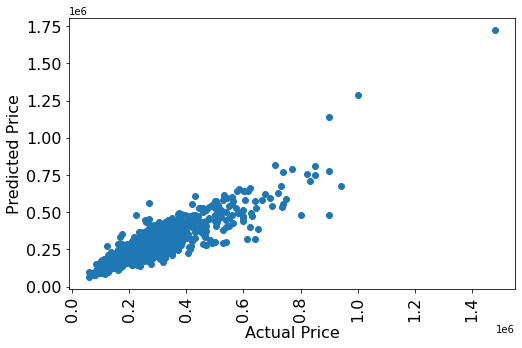

In [92]:
plt.figure(figsize=(8,5))
plt.scatter(test_y, pred_y_rf_final)
plt.xlabel('Actual Price',fontsize=16)
plt.ylabel('Predicted Price',fontsize=16)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.show()